# Code - Section "When"

In [ ]:
import datetime as dt
import matplotlib.dates as mdates
import matplotlib as mpl
from matplotlib.colorbar import ColorbarBase
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import transforms

%config InlineBackend.figure_format = 'svg'   # svg vs png format make sharper images!
%config InlineBackend.figure_format = 'retina' # much faster than svg when generating lots of points

In [233]:
df_police = pd.read_csv("ca_san_francisco_2020_04_01.csv", parse_dates=['date','time'])

/Users/siwei/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [234]:
df_police_ttime = df_police[df_police['time'].notnull()].copy()

In [235]:
df_police_ttime['week'] = df_police_ttime['date'].dt.dayofweek

In [236]:
df_police_ttime['hour'] = df_police_ttime['time'].dt.hour

In [238]:
df_hour_count = df_police_ttime.groupby(['week','hour']).count()

In [240]:
df_hour_count.reset_index(inplace=True)  

In [241]:
mon_count = df_hour_count[df_hour_count['week']==0]['raw_row_number'].reset_index(drop=True)
tue_count = df_hour_count[df_hour_count['week']==1]['raw_row_number'].reset_index(drop=True)
wed_count = df_hour_count[df_hour_count['week']==2]['raw_row_number'].reset_index(drop=True)
thu_count = df_hour_count[df_hour_count['week']==3]['raw_row_number'].reset_index(drop=True)
fri_count = df_hour_count[df_hour_count['week']==4]['raw_row_number'].reset_index(drop=True)
sat_count = df_hour_count[df_hour_count['week']==5]['raw_row_number'].reset_index(drop=True)
sun_count = df_hour_count[df_hour_count['week']==6]['raw_row_number'].reset_index(drop=True)

In [242]:
week_count = pd.DataFrame({'mon':mon_count,
                           'tue': tue_count,
                            'wed': wed_count,
                           'thu': thu_count,
                           'fri': fri_count,
                           'sat': sat_count,
                           'sun': sun_count,
                          })

In [244]:
avg_week_count = week_count.mean().mean()

In [245]:
week_percent = week_count/avg_week_count-1

In [246]:
week_percent = week_percent.to_numpy()

In [248]:
week_percent = week_percent.T

In [269]:
colors = ['#ffffe5','#fff7bc','#fee391','#fec44f',
 '#fe9929','#ec7014','#cc4c02','#993404','#662506']

In [273]:
bounds = np.arange(0,1,0.1)

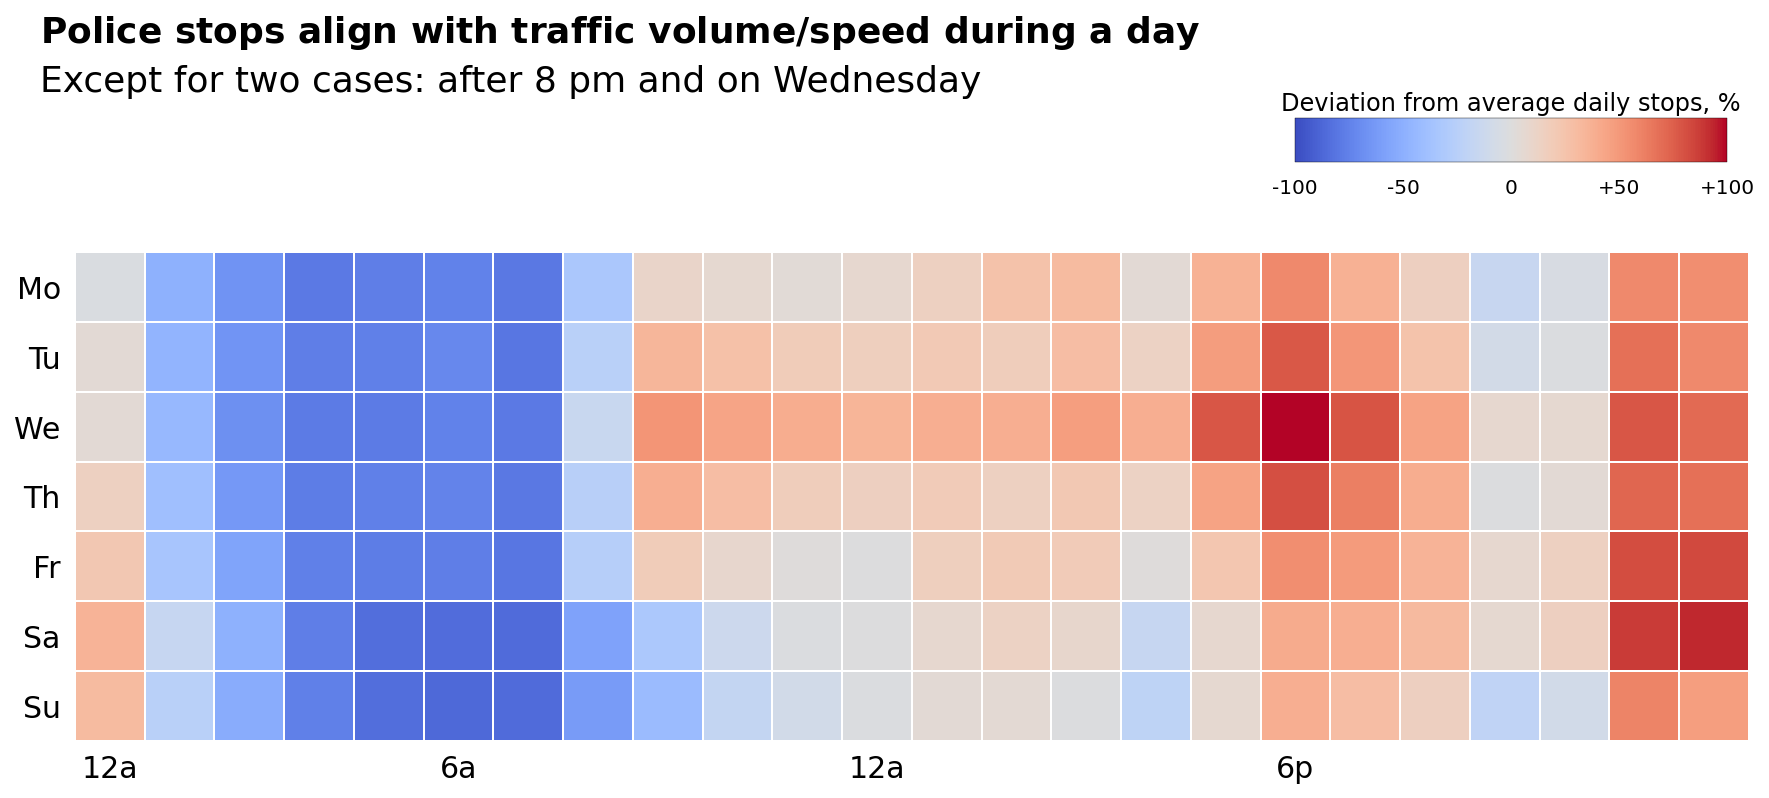

In [312]:
fig, ax = plt.subplots(figsize=(15,30))

# cmap = mpl.colors.ListedColormap(colors)

im = ax.imshow(week_percent,
               vmin=-1, vmax=1,
              cmap='coolwarm',)

for edge, spine in ax.spines.items():
    spine.set_visible(False)

ax.set_xticks(np.arange(week_percent.shape[1]+1)-.5, minor=True)
ax.set_yticks(np.arange(week_percent.shape[0]+1)-.5, minor=True)
ax.grid(which="minor", color="w", axis='x', linestyle='-', linewidth=1)
ax.grid(which="minor", color="w", axis='y', linestyle='-', linewidth=1)

ax.tick_params(which="minor", bottom=False, left=False)


ax.set_xticks([0, 5, 11, 17])
# ax.set_ticklabels(["1a", "6a", "12a", "6p", "12p"])
ax.set_xticklabels(["12a", "6a", "12a", "6p"], fontsize=15)
ax.tick_params(color='w')
ax.set_yticks(np.arange(7))
ax.set_yticklabels(["Mo", "Tu", "We", "Th", "Fr", "Sa", "Su"], fontsize=15, fontweight='normal')

ax_c = fig.add_axes([0.69, 0.58, 0.2, 0.01])
cb = fig.colorbar(im, cax=ax_c, orientation="horizontal") 

cb.set_label("Deviation from average daily stops, %", fontsize=12, fontweight = 'normal', ha = 'center')
cb.set_ticks([-1, -0.5, 0, 0.5, 1])
cb.set_ticklabels([ "-100", "-50", "0", "+50", "+100"])

# cb.outline.set_visible(False)
cb.outline.set_linewidth(0.2)
cb.ax.tick_params(length=5, width=1, direction = 'out', color='w')
cb.ax.xaxis.set_label_position('top')


ax.text(-1,-3.5, r"$\bf{Police\ stops\ align\ with\ traffic\ volume/speed\ during\ a\ day}$", fontsize=18)
ax.text(-1,-2.8, "Except for two cases: after 8 pm and on Wednesday", fontsize=18)

# ax_c = fig.add_axes([0.25, 0.4, 0.5, 0.03])

# cb2 = ColorbarBase(ax_c, cmap=cmap,
#                   boundaries=bounds,
#                   ticks=bounds,
#                   label=bounds,
#                   orientation='horizontal')
# cb2.set_label("")
# cb2.set_ticklabels(bounds)


plt.show()
